# 화소 점처리

### 산술 연산의 문제와 해결방법
> 클래핑 기법
- 255보다 크면 모두 255로 처리

> 랩핑 기법
- 255보다 크면 다시 0으로, 주기를 갖음.



# 선형연산 vs 비선형연산
> 선형연산
- 더하기, 빼기, 나누기, 곱하기
- 모두 선형변환
- 직선이라는 것은 변하지 않음.

> 비선형변환
- np.clip은 비선형

> 선형의 의미 
- 2차원 선형: 직선
- 3차원 선형: 평면
- 4차원 선형: 공간
- 예: 남, 여를 구분할 때 남자는 2층, 여자는 3층 -> 평면으로 구분 가능
- 데이터에 차원을 변환시키면 선형/ 비선형이 어려울 수 있음.

# 1. 선형 변환으로 밝기 조절(더하기, 빼기, 곱하기, 나누기)

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

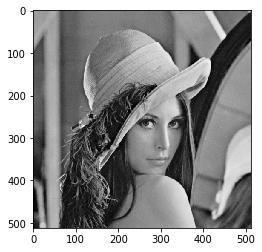

In [18]:
plt.imshow(img, cmap = 'gray')

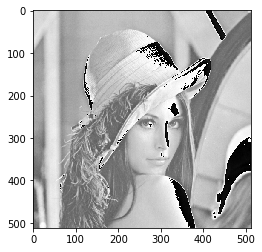

In [21]:
img2 = img + 50
plt.imshow(img2, cmap = 'gray')

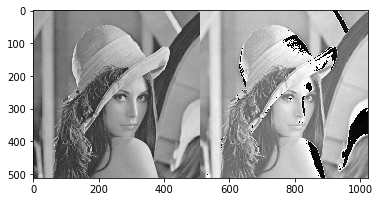

In [22]:
plt.imshow(np.hstack([img, img2]), cmap = 'gray')

> img2가 255를 넘어서 이미지가 깨짐
- 해결: 이미지를 갖고올 때 int로 갖고오기
- 처음에 갖고올 때 uint8 -> 8byte로 되어있으므로 오버플로우 발생
- int32로 바꾸기

In [26]:
img.dtype

dtype('uint8')

In [24]:
imgint = np.array(img, dtype = 'int')
# imgint = img.astype(np.int)

In [25]:
imgint.dtype

dtype('int32')

#### 자료형을 바꾸고 np.clip적용

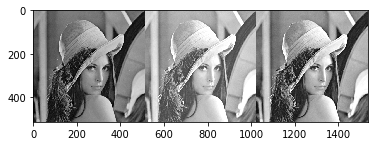

In [41]:
# 전체적으로 밝게
imgint_b = imgint + 50

# 비례해서 변하게-> 좀 더 합리적임
imgint_c = imgint * 1.2

# 원래 자료형으로 변환
imgint_b = np.clip(imgint_b, 0, 255).astype(np.uint8)
imgint_c = np.clip(imgint_c, 0, 255).astype(np.uint8)


plt.imshow(np.hstack([imgint,imgint_b, imgint_c]), cmap = 'gray')

#### np.clip()

In [30]:
a = np.array([250, 254], dtype = 'uint8')
b = a + 10
b

array([4, 8], dtype=uint8)

In [34]:
a = np.array([250,20,254], dtype = 'int')
b = a + 10
b

array([260,  30, 264])

In [35]:
c = np.clip(b ,0 , 255)
c

array([255,  30, 255])

In [36]:
# 다시 원래대로 형 변환
d = np.array(c, dtype = 'uint8')
d

array([255,  30, 255], dtype=uint8)

# 2. 비선형 변환

### 선형변환
> NUll transform
- 단순히 입력 화소를 출력 화소로 변하는 것.
- output(q) = Input(P)

> 사칙연산
- 이미지에 5를 더하는 값
- 입력값에 5를 더하고, 255를 넘는 값은 모두 255로 정하기

> 영상의 반전 변환
- output(q)= 255-input(p)

### 비선형번환
> 감마보정
- 감마값이 1보다 크면 영상이 어두워지고
- 감마값이 1보다 작으면 영상이 밝아짐.-> 이미지의 어두운 부분은 조금만 밝게, 중간 부분은 많이 밝게, 밝은 부분은 조금만 밝게.
- 밝아지는 정도, 어두워지는 정보를 다르게 주기
- 화질에 대한 보정을 픽셀 값 자체를 조절하지 않고, 감마그래프를 통해서 보정


> 포스터 라이징
- 일정 값의 범위에 있는 값을 한 색으로 조정
- 사용하는 생상의 수를 조절.
- 중간 단계가 없도록 색을 조절


> 범위 강조


### LUT(Look Up Table, mapping table)
- opencv에서 사용하는 mapping table
- y값을 담아놓은 table
- 

# 3. LUT table

In [49]:
np.max((0,1))

1

In [51]:
# null transform
lut1 = [i for i in range(256)]

# 5를 더하는 transform
lut2 = [i+ 5 for i in range(256)]

# clip함수를 적용
lut3 = np.clip(lut2, 5, 255)

In [56]:
lut4 = [np.min((i + 5, 9)) for i in range(9)]
lut4

[5, 6, 7, 8, 9, 9, 9, 9, 9]

In [55]:
lut4 = [x + 5 if x+5 <=9 else 9 for x in range(9)]
lut4

[5, 6, 7, 8, 9, 9, 9, 9, 9]

### 함수로 처리

In [69]:
# op를 더하는 함수
def addlut(op):
    return np.array([ np.min((x + op, 255)) for x in range(256)]).astype('uint8')


# op를 곱하는 함수
def mullut(op):
    return np.array([ np.min((x * op, 255)) for x in range(256)]).astype('uint8')

In [4]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

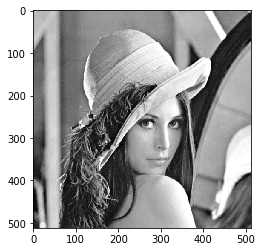

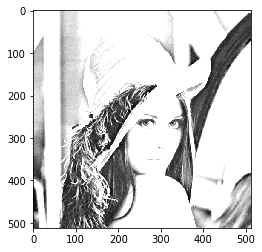

In [73]:
src2 = cv2.LUT(img, mullut(1.2))
plt.imshow(src2, cmap = 'gray')
plt.show()
plt.imshow(cv2.LUT(img, mullut(2.0)), cmap = 'gray')

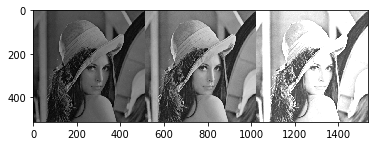

In [75]:
all = np.hstack([cv2.LUT(img, mullut(0.7)),
                cv2.LUT(img, mullut(1.0)),
                cv2.LUT(img, mullut(1.7))
                ])

plt.imshow(all, cmap = 'gray')

### binary LUT

In [83]:
def binary_lut(t):
    return np.array([255 if x > t else 0 for x in range(256)]).astype('uint8')


# 자동형변환 이용
def binary_lut2(t):
    return np.array([(x > t)*255 for x in range(256)]).astype('uint8')

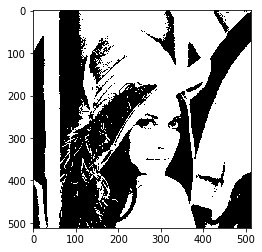

In [84]:
src = cv2.LUT(img,binary_lut(127))
plt.imshow(src, cmap = 'gray')

### reverce LUT

In [81]:
def reverce_lut(t):
    return np.array([255-x for x in range(256)]).astype('uint8')



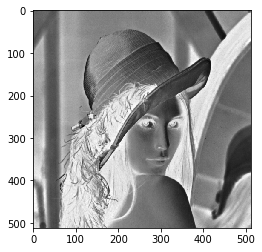

In [82]:
src = cv2.LUT(img,reverce_lut())
plt.imshow(src, cmap = 'gray')

### reverce LUT

In [85]:
def reverce_lut():
    return np.array([255-x for x in range(256)]).astype('uint8')

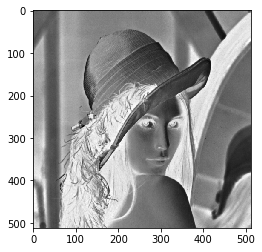

In [86]:
src = cv2.LUT(img,reverce_lut())
plt.imshow(src, cmap = 'gray')

### posterise LUT

In [101]:
def posterise_lut(t):
    return np.array([(x //t)*6  for x in range(256)]).astype('uint8')

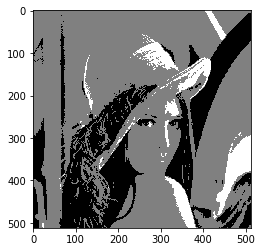

In [102]:
src = cv2.LUT(img,posterise_lut(100))
plt.imshow(src, cmap = 'gray')

#### gamma LUT

In [12]:
def gamma_lut(gamma):
    invGamma = 1.0 / gamma
    return np.array([((i/255.0)**invGamma) * 255 for i in np.arange(0, 256)]).astype('uint8')

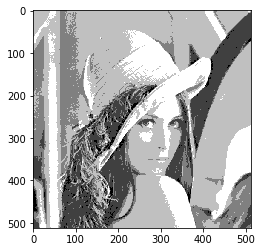

In [13]:
src = cv2.LUT(img, gamma_lut(100.0))
plt.imshow(src, cmap = 'gray')

## 작가들은 3d lut , cinimatic lut  사용

# 4. gif 파일 만들기

In [8]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

In [9]:
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

In [10]:
cv2.putText(img =col, 
            text ='gamme=0.2', 
            org =(10,30),   # 시작 위치
            fontFace =cv2.FONT_HERSHEY_SIMPLEX, 
            fontScale=1.0, 
            color =(0, 0, 255), 
            thickness =3,
           )

array([[[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [175, 175, 175],
        [162, 162, 162],
        [138, 138, 138]],

       [[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [175, 175, 175],
        [162, 162, 162],
        [138, 138, 138]],

       [[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [175, 175, 175],
        [162, 162, 162],
        [138, 138, 138]],

       ...,

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 59,  59,  59],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [114, 114, 114]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 64,  64,  64],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [122, 122, 122]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 64,  64,  64],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [122, 122, 122]]

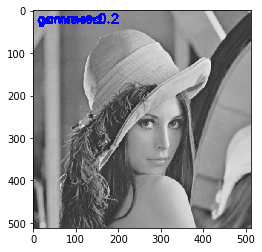

In [20]:
plt.imshow(col)

## 4.1. gif 만들기

In [13]:
img = cv2.imread('gamma.jpg')
col = cv2.LUT(img, gamma_lut(0.5))
cv2.putText(col, 'gamma = 0.5', (100,30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255,0,255), 3)
cv2.imwrite('g1.jpg', col)

col2 = cv2.LUT(img, gamma_lut(1.5))
cv2.putText(col2, 'gamma = 1.5', (100,30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255,0,255), 3)
cv2.imwrite('g2.jpg', col2)



col3 = cv2.LUT(img, gamma_lut(2.5))
cv2.putText(col3, 'gamma = 2.5', (100,30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255,0,255), 3)
cv2.imwrite('g3.jpg', col3)


True

In [19]:
img = cv2.imread('gamma.jpg')

gm = [0.5, 1.2, 2.2, 3.0]

for i in range(len(gm)):
    col = cv2.LUT(img, gamma_lut(gm[i]))
    cv2.putText(col, f"gamma = {gm[i]}", (100,30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255,0,255), 3)
    cv2.imwrite(f"g{i+1}.jpg", col)

In [17]:
from PIL import Image

In [43]:
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

In [20]:
data = [ 'img' + str(i+1) for i in range(3)]
data
for i, name in enumerate(data):
    globals()[name] = Image.open('g'+str(i+1)+'.jpg')
    

- gif 파일 만들기

In [45]:
im1.save('out1.gif', 
         save_all = True, 
         append_images=[im2, im3, im4], # 자기자신 빼고 추가하기
        duration = 1000,  # 1초 
         loop = 0
        )

<img src = 'out1.gif' width =300>

## 4.2. 원본과 함께 출력

In [34]:
img = cv2.imread('gamma.jpg')

gm = [0.5, 1.2, 2.2, 3.0]

for i in range(len(gm)):
    col = cv2.LUT(img, gamma_lut(gm[i]))
    cv2.putText(col, f"gamma = {gm[i]}", (100,30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255,0,255), 3)
    cv2.imwrite(f"g{i+1}.jpg", np.hstack([img, col]))

In [35]:
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

- gif 파일 만들기

In [54]:
im1.save('out2.gif', 
         save_all = True, 
         append_images=[im2, im3, im4], # 자기자신 빼고 추가하기
        duration = 1000,  # 1초 = 1000ms
         loop = 0   # 0: 무한
        )

<img src = 'out2.gif?1231354' width =500>

- 파일명 뒤에 ?랜덤값 -> 항상 업데이트 한다는 뜻(캐시 이용)

# 5.  PIL 에서 한글 이용하기
-  openCV는  bitmap font만 이용 가능, 한글은 불가
- PIL에서는 true type(vector) font 사용 가능, 한글 가능

In [61]:
from PIL import Image, ImageFont, ImageDraw

In [67]:
img = cv2.imread('gamma.jpg')

In [74]:
#imgPIL = Image.fromarray(img) ->  pil:  RGB /  oencv: BGR
imgPIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

type(imgPIL)

PIL.Image.Image

In [72]:
font = ImageFont.truetype('C:/windows/fonts/gulim.ttc', 50)

In [73]:
# 도화지 준비
draw = ImageDraw.Draw(imgPIL)
draw.text((60,70), '안녕', font = font, fill = (255,0,0))

imgPIL.save('piltext.jpg')

<img src ='piltext.jpg?2asd' width = 300>

# 6. PIL vs opencv
> PIL: 이미지 draw 목적
- 이미지위에 그리는 개념

> opencv: 영상처리용
- 정확한 위치에 picel by pixel 로 하나씩 그려야 함.

# 7. 역광처리
> 부분적으로 LUT 처리하기
- 값을 straching 하기
- 밝은 부분은 그대로 두고, 어두운 부분만 밝게 하기